# Clasificación por Arbol de Decisión

## Importar las librerías

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el conjunto de datos

In [4]:
datos = pd.read_csv('../Data/Social_Network_Ads.csv')
X = datos.iloc[:, :-1].values
y = datos.iloc[:, -1].values

## División del conjunto de datos en un conjunto para entrenar y otro para prueba

In [5]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
#print(X_entreno)

In [7]:
#print(y_entreno)

In [8]:
#print(X_prueba)

In [9]:
#print(y_prueba)

## Escalamiento o Normalización

In [10]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
X_entreno = normalizador.fit_transform(X_entreno)
X_prueba = normalizador.transform(X_prueba)

In [11]:
#print(X_entreno)

In [12]:
#print(X_prueba)

## Entrenar el modelo de Clasificacón por Arbol de Decisión con los datos para entrenamiento

In [13]:
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clasificador.fit(X_entreno, y_entreno)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Predecir un resultado nuevo

In [14]:
print(clasificador.predict(normalizador.transform([[30,87000]])))

[0]


## Predecir los resultados con los datos de prueba

In [15]:
y_predicciones = clasificador.predict(X_prueba)
print(np.concatenate((y_predicciones.reshape(len(y_predicciones),1), y_prueba.reshape(len(y_prueba),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## Obtener la Matriz de Confusión

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat_conf = confusion_matrix(y_prueba, y_predicciones)
print(mat_conf)
accuracy_score(y_prueba, y_predicciones)

[[62  6]
 [ 3 29]]


0.91

## Visualizar los resultados con los datos de entrenamiento

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


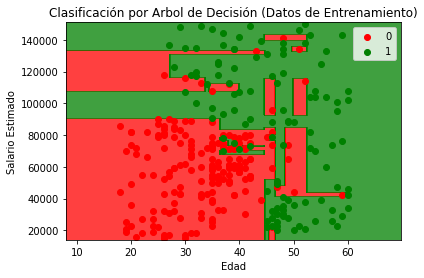

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = normalizador.inverse_transform(X_entreno), y_entreno
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clasificador.predict(normalizador.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificación por Arbol de Decisión (Datos de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()

## Visualizar los resultados con los datos de prueba

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


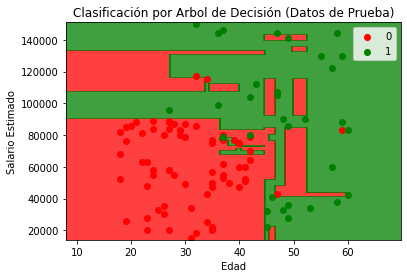

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = normalizador.inverse_transform(X_prueba), y_prueba
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, clasificador.predict(normalizador.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificación por Arbol de Decisión (Datos de Prueba)')
plt.xlabel('Edad')
plt.ylabel('Salario Estimado')
plt.legend()
plt.show()